## Predicting House Prices Using Advanced Regression

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for ridge and lasso regression.

### Business Goal 
You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

### Steps
We will use the following the steps to tackle the problem,
1. Data Loading
2. Data Cleaning
3. Data Preperation and Exploratory Data Analysis
4. Model Building & Evaluation

### Data Loading

In [1]:
#General Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Filtering Warnings
import warnings
warnings.filterwarnings('ignore') 

In [2]:
#importing the dataset
df = pd.read_csv("train.csv")

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape

(1460, 81)

The data has 1460 rows and 81 columns

### Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
#First let us check the NULL values and treat the NULL values accordingly
pd.set_option("display.max_rows", 90)
round((df.isnull().sum()/len(df))*100,2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

We can see that Alley, , MiscFeature and Fence have very high NULL values <br>
Before removing them let's see what each variable means <br>
<b>Alley</b> tells the type of Alley, since majority of the houses available in the dataset do not have an Alley, it is safe to remove it <br>
<b>PoolQC</b> tells the quality of the pool, since 99.52% houses do not have a pool, it would not contribute much, hence it is safe to remove <br>
<b>MiscFeature</b> tells the Miscellaneous feature not covered in other categories like Elevator, 2nd Garage, this would contribute to the increase in price, hence it is better not to delete. <br>
<b>Fence</b> tells whether the property has a fence or not, Since many do not have a Fence we can remove this <br>


In [7]:
df = df.drop(columns = ['Alley','PoolQC','Fence'])

In [8]:
#Checking the NULL Values again
round((df.isnull().sum()/len(df))*100,2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF          0.00
2ndFlrSF   

Handling MiscFeature - Let's see what type of data it has <br>
MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None

In [9]:
df['MiscFeature'].value_counts()

Shed    49
Othr     2
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64

In [10]:
df['MiscFeature'].isnull().sum()

1406

Here Null Means that there is no Extra Feature, we can change null with NoFeature

In [11]:
df['MiscFeature'] = df['MiscFeature'].fillna("NA")

In [12]:
df['MiscFeature'].value_counts()

NA      1406
Shed      49
Othr       2
Gar2       2
TenC       1
Name: MiscFeature, dtype: int64

In [13]:
#Checking the NULL values again
round((df.isnull().sum()/len(df))*100,2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF          0.00
2ndFlrSF   

There are NULL values in following columns:
1. FireplaceQu
2. LotFrontage
3. GarageType
4. GarageYrBlt
5. GarageFinish
6. GarageQual 
7. GarageCond 
8. BsmtQual
9. BsmtCond 
10. BsmtExposure 
11. BsmtFinType1
12. BsmtFinType2
13. MasVnrType
14. MasVnrArea
15. Electrical

Let's handle them one by one

Checking FireplaceQu
FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace

In [14]:
df['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [15]:
df['FireplaceQu'] = df['FireplaceQu'].fillna("NA")

Checking LotFrontage
LotFrontage: Linear feet of street connected to property
It has 17% NULL values, since it is a numerical veriable, let's check the distribution

In [16]:
df['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

Let's fill the NULL values with the mean value

In [17]:
df['LotFrontage'].mean()

70.04995836802665

In [18]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())

Checking GarageType
GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage

In [19]:
df['GarageType'] = df['GarageType'].fillna("NA")

Checking GarageYrBlt <br>
GarageYrBlt: Year garage was built <br>
It means that the Garage is not there hence it was not built, let's check if it is the same entries as other columns

In [20]:
df_garage = df[['GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageArea','GarageQual']]
df_garage[df_garage['GarageYrBlt'].isna()] 

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual
39,NA,NaN,NaN,0,0,NaN
48,NA,NaN,NaN,0,0,NaN
78,NA,NaN,NaN,0,0,NaN
88,NA,NaN,NaN,0,0,NaN
89,NA,NaN,NaN,0,0,NaN
99,NA,NaN,NaN,0,0,NaN
108,NA,NaN,NaN,0,0,NaN
125,NA,NaN,NaN,0,0,NaN
127,NA,NaN,NaN,0,0,NaN
140,NA,NaN,NaN,0,0,NaN


It is the same, hence we can fill NULL values as 0

In [21]:
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)

In [22]:
df['GarageYrBlt'].value_counts()

0.0       81
2005.0    65
2006.0    59
2004.0    53
2003.0    50
          ..
1906.0     1
1927.0     1
1900.0     1
1908.0     1
1933.0     1
Name: GarageYrBlt, Length: 98, dtype: int64

Checking GarageFinish <br>
GarageFinish: Interior finish of the garage

In [23]:
df['GarageFinish'] = df['GarageFinish'].fillna("NA")

Checking GarageQual and GarageCond 
GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

In [24]:
df['GarageQual'] = df['GarageQual'].fillna("NA")
df['GarageCond'] = df['GarageCond'].fillna("NA")

Checking BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1 and BsmtFinType2 <br>
BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	
BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	
BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
       
BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

In [25]:
df['BsmtQual'] = df['BsmtQual'].fillna("NA")
df['BsmtCond'] = df['BsmtCond'].fillna("NA")
df['BsmtExposure'] = df['BsmtExposure'].fillna("NA")
df['BsmtFinType1'] = df['BsmtFinType1'].fillna("NA")
df['BsmtFinType2'] = df['BsmtFinType2'].fillna("NA")

In [26]:
df['BsmtFinType2'].value_counts()

Unf    1256
Rec      54
LwQ      46
NA       38
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

Checking MasVnrType and MasVnrArea <br>

MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
	
MasVnrArea: Masonry veneer area in square feet


In [27]:
df['MasVnrType'] = df['MasVnrType'].fillna("None")
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)

Checking Electrical <br>
Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed

In [28]:
df['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [29]:
df['Electrical'].isnull().sum()

1

Only 1 record doesn't have any value, let's make that value as average for our convenience

In [30]:
df['Electrical'] = df['Electrical'].fillna('FuseA')

In [31]:
df['Electrical'].value_counts()

SBrkr    1334
FuseA      95
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [32]:
#Checking the NULL Values again
round((df.isnull().sum()/len(df))*100,2)

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath 

The NULL Values have been handled

### Data Preperation and Exploratory Data Analysis

Let's go over the data and see what each feature means and whether it is useful for our analysis

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

We can remove ID column since it is not useful

In [34]:
df = df.drop(columns=['Id'])

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

Let us look at categorical data first

In [36]:
df_categorical = df.select_dtypes(include='object')
df_categorical.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,MiscFeature,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Typ,NA,Attchd,RFn,TA,TA,Y,NA,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,Typ,TA,Attchd,RFn,TA,TA,Y,NA,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Typ,TA,Attchd,RFn,TA,TA,Y,NA,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Typ,Gd,Detchd,Unf,TA,TA,Y,NA,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Typ,TA,Attchd,RFn,TA,TA,Y,NA,WD,Normal


In [37]:
#Let us check the unique values in each of the categorical variables
df_categorical.nunique()

MSZoning          5
Street            2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          5
BsmtCond          5
BsmtExposure      5
BsmtFinType1      7
BsmtFinType2      7
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
FireplaceQu       6
GarageType        7
GarageFinish      4
GarageQual        6
GarageCond        6
PavedDrive        3
MiscFeature       5
SaleType          9
SaleCondition     6
dtype: int64

In [38]:
categories_for_dummy_cols = ['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope',
                             'Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','MasVnrType',
                             'Foundation','Heating','CentralAir','Electrical','Functional','GarageType','GarageFinish',
                             'PavedDrive','SaleType','SaleCondition','MiscFeature']
categories_for_encoding_cols = ['ExterCond','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
                                'HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond']
categories_for_impeding = ['Neighborhood','Exterior1st','Exterior2nd']

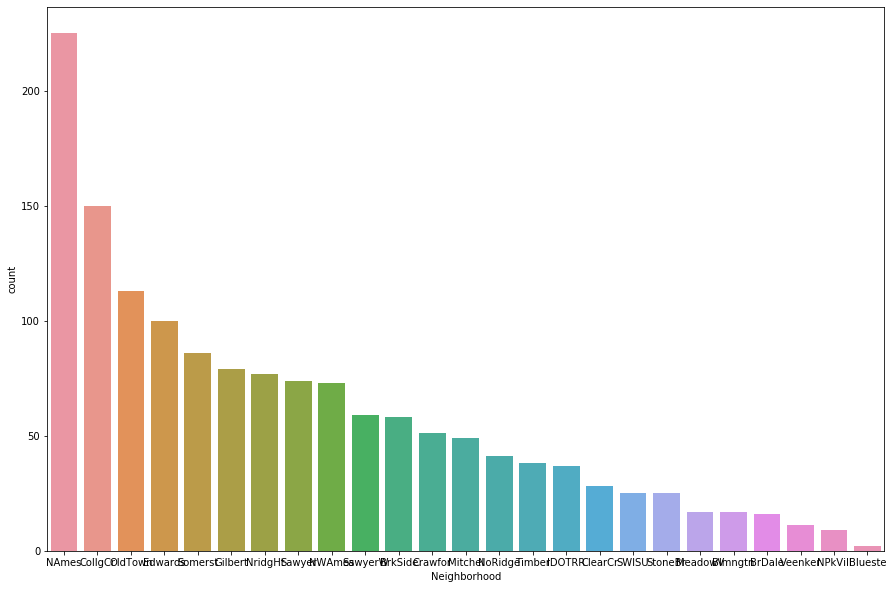

In [39]:
#Checking the Distribution of Neighbourhood and keeping only top 5 values
plt.figure(figsize=(15,10))
ax = sns.countplot(x="Neighborhood", data=df_categorical,order = df_categorical['Neighborhood'].value_counts().index)
plt.show()

In [40]:
df_categorical['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [41]:
#Keeping top 5 Neighborhoods
top5_neighbourhoods = df_categorical['Neighborhood'].value_counts().reset_index()['index'].values.tolist()[:5]
top5_neighbourhoods

['NAmes', 'CollgCr', 'OldTown', 'Edwards', 'Somerst']

In [42]:
df_categorical['Neighborhood'] = df_categorical['Neighborhood'].apply(lambda x: x if x in top5_neighbourhoods else "Others")

In [43]:
df_categorical['Neighborhood'].value_counts()

Others     786
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Name: Neighborhood, dtype: int64

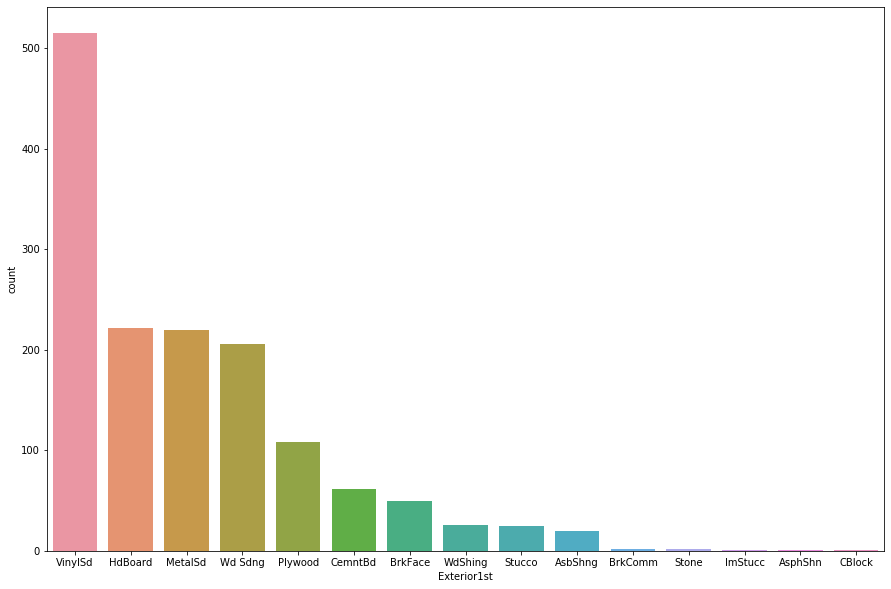

In [44]:
#Checking the Distribution of Exterior1st and keeping only top 4 values
plt.figure(figsize=(15,10))
ax = sns.countplot(x="Exterior1st", data=df_categorical,order = df_categorical['Exterior1st'].value_counts().index)
plt.show()

In [45]:
#Keeping top 4 Exterior1st
top4_Exterior1st = df_categorical['Exterior1st'].value_counts().reset_index()['index'].values.tolist()[:4]
top4_Exterior1st

['VinylSd', 'HdBoard', 'MetalSd', 'Wd Sdng']

In [46]:
df_categorical['Exterior1st'] = df_categorical['Exterior1st'].apply(lambda x: x if x in top4_Exterior1st else "Others")

In [47]:
df_categorical['Exterior1st'].value_counts()

VinylSd    515
Others     297
HdBoard    222
MetalSd    220
Wd Sdng    206
Name: Exterior1st, dtype: int64

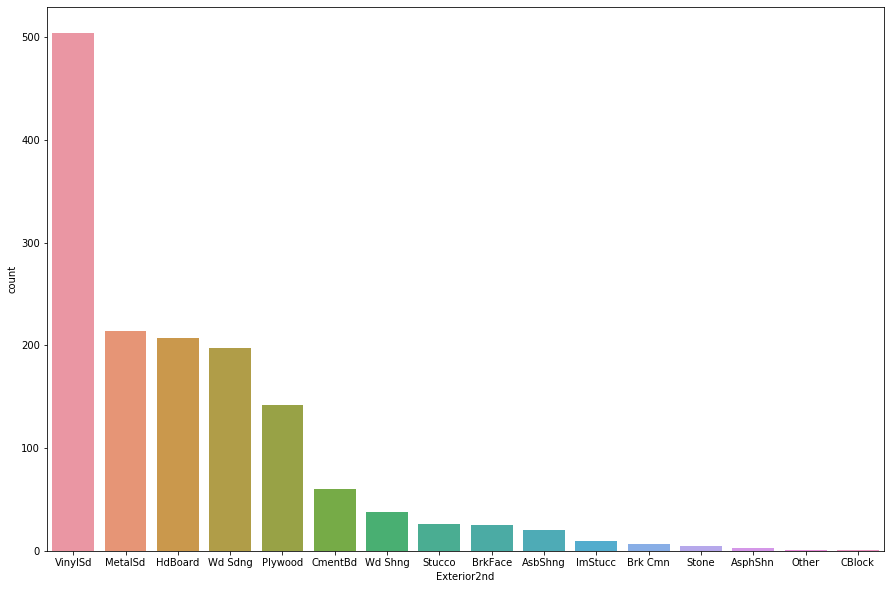

In [48]:
#Checking the Distribution of Exterior2nd and keeping only top 4 values
plt.figure(figsize=(15,10))
ax = sns.countplot(x="Exterior2nd", data=df_categorical,order = df_categorical['Exterior2nd'].value_counts().index)
plt.show()

In [49]:
#Keeping top 4 Exterior2nd
top4_Exterior2nd = df_categorical['Exterior2nd'].value_counts().reset_index()['index'].values.tolist()[:4]
top4_Exterior2nd

['VinylSd', 'MetalSd', 'HdBoard', 'Wd Sdng']

In [50]:
df_categorical['Exterior2nd'] = df_categorical['Exterior2nd'].apply(lambda x: x if x in top4_Exterior2nd else "Others")

In [51]:
df_categorical['Exterior2nd'].value_counts()

VinylSd    504
Others     338
MetalSd    214
HdBoard    207
Wd Sdng    197
Name: Exterior2nd, dtype: int64

In [52]:
categories_for_dummy_cols = categories_for_dummy_cols + categories_for_impeding

In [53]:
categories_for_dummy_cols

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'MasVnrType',
 'Foundation',
 'Heating',
 'CentralAir',
 'Electrical',
 'Functional',
 'GarageType',
 'GarageFinish',
 'PavedDrive',
 'SaleType',
 'SaleCondition',
 'MiscFeature',
 'Neighborhood',
 'Exterior1st',
 'Exterior2nd']

In [54]:
#Encoding columns
categories_for_encoding_cols

['ExterCond',
 'ExterQual',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'HeatingQC',
 'KitchenQual',
 'FireplaceQu',
 'GarageQual',
 'GarageCond']

In [55]:
def ExGdEncoding(x):
    dict_ref = {'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5,'NA':0}
    return dict_ref[x]
def GdAvEncoding(x):
    dict_ref = {'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4}
    return dict_ref[x]
def GLQEncoding(x):
    dict_ref = {'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6}
    return dict_ref[x]
ExGdEncodingList = ['ExterCond','ExterQual','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond']
GdAvEncodingList = ['BsmtExposure',]
GLQEncodingList = ['BsmtFinType1','BsmtFinType2']

for col in ExGdEncodingList:
    df_categorical[col] = df_categorical[col].apply(ExGdEncoding)
for col in GdAvEncodingList:
    df_categorical[col] = df_categorical[col].apply(GdAvEncoding)
for col in GLQEncodingList:
    df_categorical[col] = df_categorical[col].apply(GLQEncoding)

df_categorical[categories_for_encoding_cols].head()    

,ExterCond,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,FireplaceQu,GarageQual,GarageCond
0,3,4,4,3,1,6,1,5,4,0,3,3
1,3,3,4,3,4,5,1,5,3,3,3,3
2,3,4,4,3,2,6,1,5,4,3,3,3
3,3,3,3,4,1,5,1,4,4,4,3,3
4,3,4,4,3,3,6,1,5,4,3,3,3


In [56]:
#Checking if not missing any categorical columns
len(df_categorical.columns) == len(categories_for_encoding_cols + categories_for_dummy_cols)

True

In [57]:
#Creating Dummy Variables for the remaining Categorical Variables
df_categorical_dummy = pd.get_dummies(df_categorical[categories_for_dummy_cols],drop_first=True)
df_categorical_dummy

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,Neighborhood_Others,Neighborhood_Somerst,Exterior1st_MetalSd,Exterior1st_Others,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_MetalSd,Exterior2nd_Others,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng
0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,...,1,0,1,0,0,0,1,0,0,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
4,0,0,1,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,1,0,1,0,0,1,0,0,...,1,0,0,0,1,0,0,0,1,0
1456,0,0,1,0,1,0,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0
1457,0,0,1,0,1,0,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0
1458,0,0,1,0,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0


In [58]:
df_categorical = df_categorical.drop(columns =categories_for_dummy_cols )
df_categorical = pd.concat([df_categorical,df_categorical_dummy],axis=1)

In [59]:
df_categorical

,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,FireplaceQu,...,Neighborhood_Others,Neighborhood_Somerst,Exterior1st_MetalSd,Exterior1st_Others,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_MetalSd,Exterior2nd_Others,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng
0,4,3,4,3,1,6,1,5,4,0,...,0,0,0,0,1,0,0,0,1,0
1,3,3,4,3,4,5,1,5,3,3,...,1,0,1,0,0,0,1,0,0,0
2,4,3,4,3,2,6,1,5,4,3,...,0,0,0,0,1,0,0,0,1,0
3,3,3,3,4,1,5,1,4,4,4,...,1,0,0,0,0,1,0,1,0,0
4,4,3,4,3,3,6,1,5,4,3,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,3,4,3,1,1,1,5,3,3,...,1,0,0,0,1,0,0,0,1,0
1456,3,3,4,3,1,5,3,3,3,3,...,1,0,0,1,0,0,0,1,0,0
1457,5,4,3,4,1,6,1,5,4,4,...,1,0,0,1,0,0,0,1,0,0
1458,3,3,3,3,2,6,3,4,4,0,...,0,0,1,0,0,0,1,0,0,0


Looking at the Numerical Data

In [60]:
df_numerical = df.select_dtypes(include=['int64','float64'])
df_numerical.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [61]:
df_numerical.nunique()

MSSubClass         15
LotFrontage       111
LotArea          1073
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
MasVnrArea        327
BsmtFinSF1        637
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
1stFlrSF          753
2ndFlrSF          417
LowQualFinSF       24
GrLivArea         861
BsmtFullBath        4
BsmtHalfBath        3
FullBath            4
HalfBath            3
BedroomAbvGr        8
KitchenAbvGr        4
TotRmsAbvGrd       12
Fireplaces          4
GarageYrBlt        98
GarageCars          5
GarageArea        441
WoodDeckSF        274
OpenPorchSF       202
EnclosedPorch     120
3SsnPorch          20
ScreenPorch        76
PoolArea            8
MiscVal            21
MoSold             12
YrSold              5
SalePrice         663
dtype: int64

Among the above, by verifying with data dictionary, we can see that the follwing columns are categorical, though they have numeric values:<br>
OverallQual<br>
OverallCond<br>
YearBuilt<br>
YearRemodAdd<br>
BsmtFullBath<br>
BsmtHalfBath<br>
FullBath<br>
HalfBath<br>
BedroomAbvGr<br>
KitchenAbvGr<br>
BedroomAbvGr<br>
KitchenAbvGr<br>
GarageYrBlt<br>
GarageCars<br>
PoolArea<br>
MoSold<br>
YrSold<br>
We will be dropping these from the current dataframe

In [62]:
NumericalCategoricalDataColumns = ['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 
                                    'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
                                   'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 
                                   'MoSold', 'YrSold']

In [63]:
df_numerical = df_numerical.drop(columns=NumericalCategoricalDataColumns)

In [64]:
df_numerical

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,0,0,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0,0,181500
2,68.0,11250,162.0,486,0,434,920,920,866,0,1786,608,0,42,0,0,0,0,0,223500
3,60.0,9550,0.0,216,0,540,756,961,756,0,1717,642,0,35,272,0,0,0,0,140000
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,836,192,84,0,0,0,0,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,0.0,0,0,953,953,953,694,0,1647,460,0,40,0,0,0,0,0,175000
1456,85.0,13175,119.0,790,163,589,1542,2073,0,0,2073,500,349,0,0,0,0,0,0,210000
1457,66.0,9042,0.0,275,0,877,1152,1188,1152,0,2340,252,0,60,0,0,0,0,2500,266500
1458,68.0,9717,0.0,49,1029,0,1078,1078,0,0,1078,240,366,0,112,0,0,0,0,142125


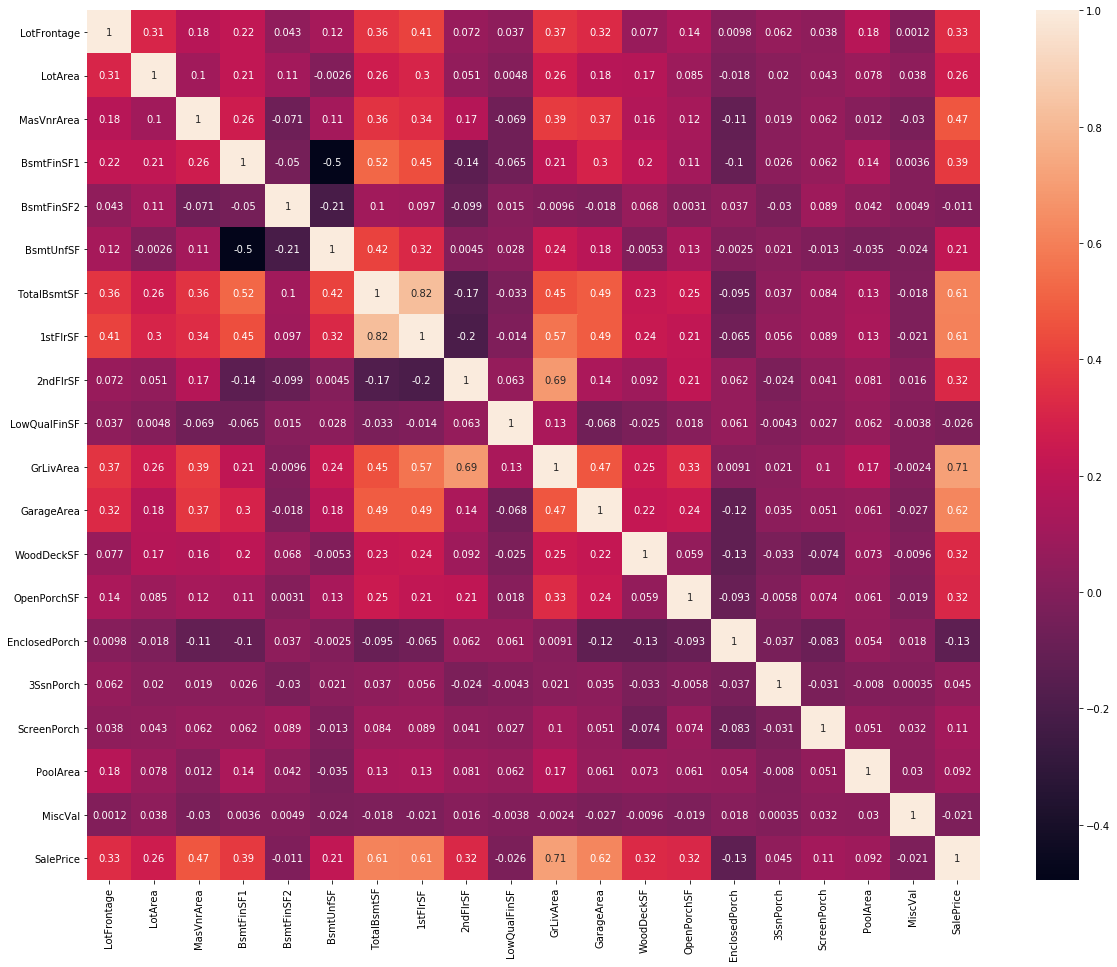

In [65]:
#Looking at the Correlation Among these variables
plt.figure(figsize=(20,16))
sns.heatmap(df_numerical.corr(),annot=True)
plt.show()

- We can see that :
- SalePrice is highly positively related with TotalBsmtSF, GrLivArea, 1stFlrSF and GarageArea
- Price is not strongly negatively reated to any variable
- BsmtFinSF2,LowQualFinSF, 3SsnPorch,PoolArea and MiscVal have a very weak correlation with SalePrice, retaining these won't contribute much to our analysis, so we will be dropping these as well. 
- TotalBsmtSF and 1stFlrSF show a correlation of 82%
- So we will be dropping one.

In [66]:
df_numerical =  df_numerical.drop(['BsmtFinSF2','LowQualFinSF','3SsnPorch','PoolArea','1stFlrSF'],axis = 1)
df_numerical.shape

(1460, 15)

<Figure size 1440x1296 with 0 Axes>

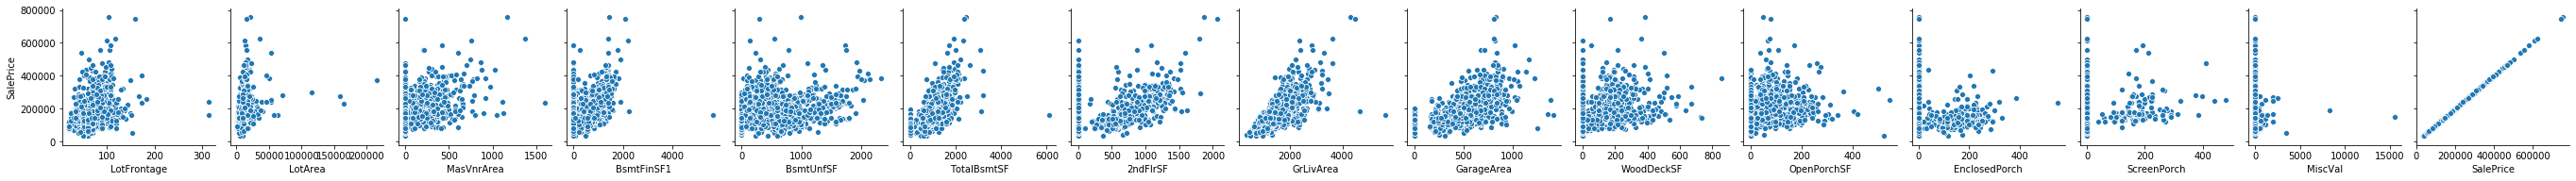

In [67]:
#Looking at a pairplot
plt.figure(figsize=(20,18))
sns.pairplot(data = df_numerical,x_vars=df_numerical.columns,y_vars='SalePrice')
plt.show()

In [68]:
#Checking if there are any outliers
df_numerical.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MiscVal,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,103.117123,443.639726,567.240411,1057.429452,346.992466,1515.463699,472.980137,94.244521,46.660274,21.954110,15.060959,43.489041,180921.195890
std,22.024023,9981.264932,180.731373,456.098091,441.866955,438.705324,436.528436,525.480383,213.804841,125.338794,66.256028,61.119149,55.757415,496.123024,79442.502883
min,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,60.000000,7553.500000,0.000000,0.000000,223.000000,795.750000,0.000000,1129.500000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000
50%,70.049958,9478.500000,0.000000,383.500000,477.500000,991.500000,0.000000,1464.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,163000.000000
75%,79.000000,11601.500000,164.250000,712.250000,808.000000,1298.250000,728.000000,1776.750000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,214000.000000
90%,92.000000,14381.700000,335.000000,1065.500000,1232.000000,1602.200000,954.200000,2158.300000,757.100000,262.000000,130.000000,112.000000,0.000000,0.000000,278000.000000
95%,104.000000,17401.150000,456.000000,1274.000000,1468.000000,1753.000000,1141.050000,2466.100000,850.100000,335.000000,175.050000,180.150000,160.000000,0.000000,326100.000000
99%,137.410000,37567.640000,791.280000,1572.410000,1797.050000,2155.050000,1418.920000,3123.480000,1002.790000,505.460000,285.820000,261.050000,268.050000,700.000000,442567.010000


Looking at the above chart it is evident that LotArea, LotFrontage,MasVnrArea,BsmtFinSF1 and BsmtUnfSF have some outliers

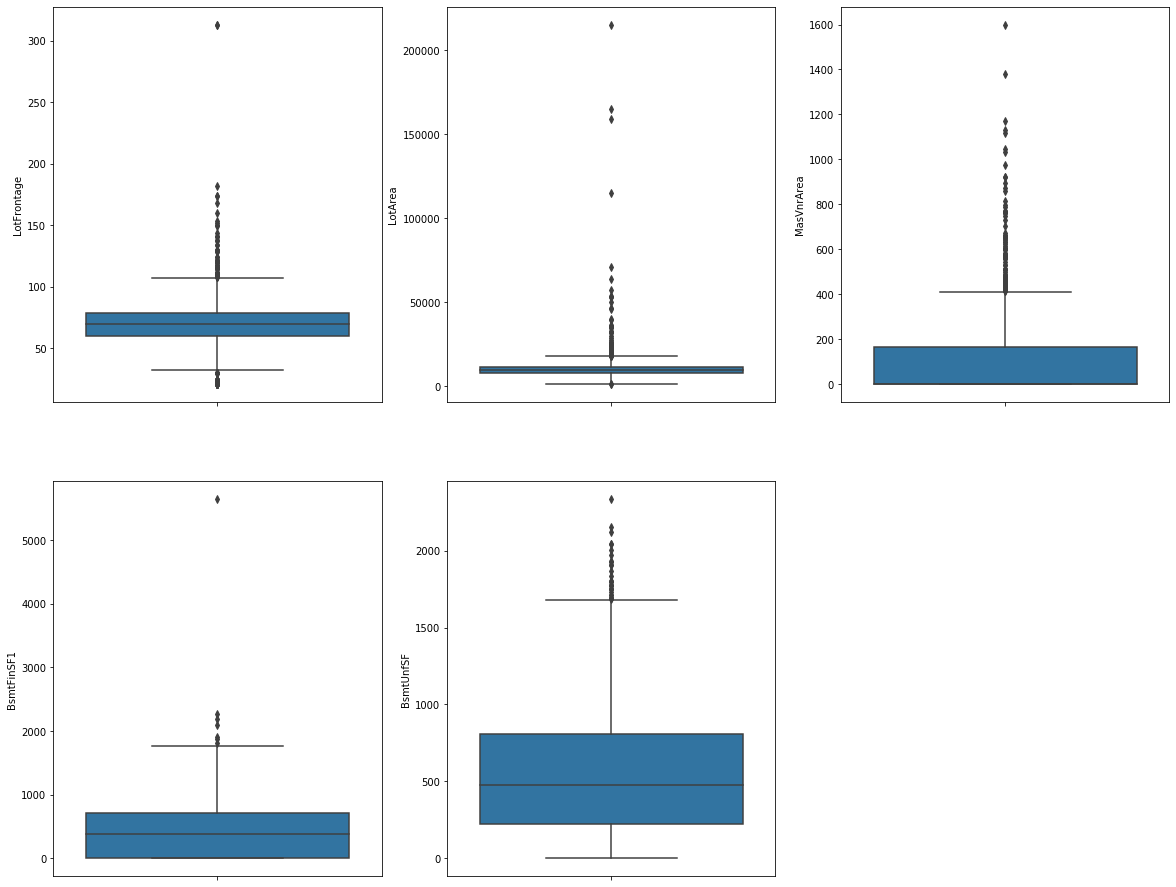

In [69]:
#Confirming Using Box Plot
plt.figure(figsize=(20,16))
plt.subplot(2,3,1)
sns.boxplot(y= df_numerical['LotFrontage'])
plt.subplot(2,3,2)
sns.boxplot(y= df_numerical['LotArea'])
plt.subplot(2,3,3)
sns.boxplot(y =df_numerical['MasVnrArea'])
plt.subplot(2,3,4)
sns.boxplot(y=df_numerical['BsmtFinSF1'])
plt.subplot(2,3,5)
sns.boxplot(y = df_numerical['BsmtUnfSF'])
plt.show()

Hence it is better to Standardize the data

In [70]:
df_numerical.shape

(1460, 15)

In [71]:
#Checking the Numerical Categorical Data
df_numerical_categorical = df[NumericalCategoricalDataColumns]
df_numerical_categorical

,MSSubClass,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,MoSold,YrSold
0,60,7,5,2003,2003,1,0,2,1,3,1,8,0,2003.0,2,2,2008
1,20,6,8,1976,1976,0,1,2,0,3,1,6,1,1976.0,2,5,2007
2,60,7,5,2001,2002,1,0,2,1,3,1,6,1,2001.0,2,9,2008
3,70,7,5,1915,1970,1,0,1,0,3,1,7,1,1998.0,3,2,2006
4,60,8,5,2000,2000,1,0,2,1,4,1,9,1,2000.0,3,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,6,5,1999,2000,0,0,2,1,3,1,7,1,1999.0,2,8,2007
1456,20,6,6,1978,1988,1,0,2,0,3,1,7,2,1978.0,2,2,2010
1457,70,7,9,1941,2006,0,0,2,0,4,1,9,2,1941.0,1,5,2010
1458,20,5,6,1950,1996,1,0,1,0,2,1,5,0,1950.0,1,4,2010


In [72]:
df_numerical_categorical.nunique()

MSSubClass       15
OverallQual      10
OverallCond       9
YearBuilt       112
YearRemodAdd     61
BsmtFullBath      4
BsmtHalfBath      3
FullBath          4
HalfBath          3
BedroomAbvGr      8
KitchenAbvGr      4
TotRmsAbvGrd     12
Fireplaces        4
GarageYrBlt      98
GarageCars        5
MoSold           12
YrSold            5
dtype: int64

In [73]:
#Calculating the age of the Property at the time of selling
df_numerical_categorical['AgeAtSell'] = df_numerical_categorical['YrSold'] - df_numerical_categorical['YearBuilt']

In [74]:
df_numerical_categorical['AgeAtSell'].value_counts()

1      100
0       64
4       41
2       39
3       36
      ... 
79       1
109      1
135      1
107      1
136      1
Name: AgeAtSell, Length: 122, dtype: int64

In [75]:
#Dropping columns YrSold, YearBuilt, YearRemodAdd and MoSold
df_numerical_categorical = df_numerical_categorical.drop(columns=[ 'YrSold', 'YearBuilt', 'YearRemodAdd','MoSold'])

In [76]:
#Dropping GarageYrBlt as well as it will not help with the analysis
df_numerical_categorical = df_numerical_categorical.drop(columns=['GarageYrBlt'])

In [77]:
df_numerical_categorical

,MSSubClass,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,AgeAtSell
0,60,7,5,1,0,2,1,3,1,8,0,2,5
1,20,6,8,0,1,2,0,3,1,6,1,2,31
2,60,7,5,1,0,2,1,3,1,6,1,2,7
3,70,7,5,1,0,1,0,3,1,7,1,3,91
4,60,8,5,1,0,2,1,4,1,9,1,3,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,6,5,0,0,2,1,3,1,7,1,2,8
1456,20,6,6,1,0,2,0,3,1,7,2,2,32
1457,70,7,9,0,0,2,0,4,1,9,2,1,69
1458,20,5,6,1,0,1,0,2,1,5,0,1,60


In [78]:
#Forming the Final Dataframe with all the df
finalDf = pd.concat([df_categorical,df_numerical,df_numerical_categorical],axis=1)
finalDf

,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,FireplaceQu,...,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,AgeAtSell
0,4,3,4,3,1,6,1,5,4,0,...,1,0,2,1,3,1,8,0,2,5
1,3,3,4,3,4,5,1,5,3,3,...,0,1,2,0,3,1,6,1,2,31
2,4,3,4,3,2,6,1,5,4,3,...,1,0,2,1,3,1,6,1,2,7
3,3,3,3,4,1,5,1,4,4,4,...,1,0,1,0,3,1,7,1,3,91
4,4,3,4,3,3,6,1,5,4,3,...,1,0,2,1,4,1,9,1,3,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,3,4,3,1,1,1,5,3,3,...,0,0,2,1,3,1,7,1,2,8
1456,3,3,4,3,1,5,3,3,3,3,...,1,0,2,0,3,1,7,2,2,32
1457,5,4,3,4,1,6,1,5,4,4,...,0,0,2,0,4,1,9,2,1,69
1458,3,3,3,3,2,6,3,4,4,0,...,1,0,1,0,2,1,5,0,1,60


### Model Building & Evaluation

In [79]:
#Scaling the Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#storing column names
cols = finalDf.columns
finalDf = pd.DataFrame(scaler.fit_transform(finalDf))
#Re Assigning column names
finalDf.columns = cols
finalDf

,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,FireplaceQu,...,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,AgeAtSell
0,1.052302,-0.238112,0.583168,0.117884,-0.590555,1.164712,-0.277189,0.891179,0.735994,-1.008334,...,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,0.912210,-0.951226,0.311725,-1.043259
1,-0.689604,-0.238112,0.583168,0.117884,2.220999,0.690115,-0.277189,0.891179,-0.771091,0.648890,...,-0.819964,3.948809,0.789741,-0.761621,0.163779,-0.211454,-0.318683,0.600495,0.311725,-0.183465
2,1.052302,-0.238112,0.583168,0.117884,0.346630,1.164712,-0.277189,0.891179,0.735994,0.648890,...,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,-0.318683,0.600495,0.311725,-0.977121
3,-0.689604,-0.238112,-0.558153,1.929579,-0.590555,0.690115,-0.277189,-0.151386,0.735994,1.201298,...,1.107810,-0.241061,-1.026041,-0.761621,0.163779,-0.211454,0.296763,0.600495,1.650307,1.800676
4,1.052302,-0.238112,0.583168,0.117884,1.283814,1.164712,-0.277189,0.891179,0.735994,0.648890,...,1.107810,-0.241061,0.789741,1.227585,1.390023,-0.211454,1.527656,0.600495,1.650307,-0.944052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.689604,-0.238112,0.583168,0.117884,-0.590555,-1.208270,-0.277189,0.891179,-0.771091,0.648890,...,-0.819964,-0.241061,0.789741,1.227585,0.163779,-0.211454,0.296763,0.600495,0.311725,-0.944052
1456,-0.689604,-0.238112,0.583168,0.117884,-0.590555,0.690115,1.964896,-1.193952,-0.771091,0.648890,...,1.107810,-0.241061,0.789741,-0.761621,0.163779,-0.211454,0.296763,2.152216,0.311725,-0.150396
1457,2.794208,2.611429,-0.558153,1.929579,-0.590555,1.164712,-0.277189,0.891179,0.735994,1.201298,...,-0.819964,-0.241061,0.789741,-0.761621,1.390023,-0.211454,1.527656,2.152216,-1.026858,1.073157
1458,-0.689604,-0.238112,-0.558153,0.117884,0.346630,1.164712,1.964896,-0.151386,0.735994,-1.008334,...,1.107810,-0.241061,-1.026041,-0.761621,-1.062465,-0.211454,-0.934130,-0.951226,-1.026858,0.775536


In [80]:
#Creating X and y
y = finalDf.pop('SalePrice')
X = finalDf

In [81]:
y

0       0.347273
1       0.007288
2       0.536154
3      -0.515281
4       0.869843
          ...   
1455   -0.074560
1456    0.366161
1457    1.077611
1458   -0.488523
1459   -0.420841
Name: SalePrice, Length: 1460, dtype: float64

In [82]:
X

,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,FireplaceQu,...,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,AgeAtSell
0,1.052302,-0.238112,0.583168,0.117884,-0.590555,1.164712,-0.277189,0.891179,0.735994,-1.008334,...,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,0.912210,-0.951226,0.311725,-1.043259
1,-0.689604,-0.238112,0.583168,0.117884,2.220999,0.690115,-0.277189,0.891179,-0.771091,0.648890,...,-0.819964,3.948809,0.789741,-0.761621,0.163779,-0.211454,-0.318683,0.600495,0.311725,-0.183465
2,1.052302,-0.238112,0.583168,0.117884,0.346630,1.164712,-0.277189,0.891179,0.735994,0.648890,...,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,-0.318683,0.600495,0.311725,-0.977121
3,-0.689604,-0.238112,-0.558153,1.929579,-0.590555,0.690115,-0.277189,-0.151386,0.735994,1.201298,...,1.107810,-0.241061,-1.026041,-0.761621,0.163779,-0.211454,0.296763,0.600495,1.650307,1.800676
4,1.052302,-0.238112,0.583168,0.117884,1.283814,1.164712,-0.277189,0.891179,0.735994,0.648890,...,1.107810,-0.241061,0.789741,1.227585,1.390023,-0.211454,1.527656,0.600495,1.650307,-0.944052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.689604,-0.238112,0.583168,0.117884,-0.590555,-1.208270,-0.277189,0.891179,-0.771091,0.648890,...,-0.819964,-0.241061,0.789741,1.227585,0.163779,-0.211454,0.296763,0.600495,0.311725,-0.944052
1456,-0.689604,-0.238112,0.583168,0.117884,-0.590555,0.690115,1.964896,-1.193952,-0.771091,0.648890,...,1.107810,-0.241061,0.789741,-0.761621,0.163779,-0.211454,0.296763,2.152216,0.311725,-0.150396
1457,2.794208,2.611429,-0.558153,1.929579,-0.590555,1.164712,-0.277189,0.891179,0.735994,1.201298,...,-0.819964,-0.241061,0.789741,-0.761621,1.390023,-0.211454,1.527656,2.152216,-1.026858,1.073157
1458,-0.689604,-0.238112,-0.558153,0.117884,0.346630,1.164712,1.964896,-0.151386,0.735994,-1.008334,...,1.107810,-0.241061,-1.026041,-0.761621,-1.062465,-0.211454,-0.934130,-0.951226,-1.026858,0.775536


In [83]:
#Creating the train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

In [84]:
#Checking the split
print('X_train shape:',X_train.shape)
print(type(X_train))
print('X_test shape:',X_test.shape)
print(type(X_test))
print('y_train shape:',y_train.shape)
print(type(y_train))
print('y_test shape:',y_test.shape)
print(type(y_test))

X_train shape: (1021, 160)
<class 'pandas.core.frame.DataFrame'>
X_test shape: (438, 160)
<class 'pandas.core.frame.DataFrame'>
y_train shape: (1021,)
<class 'pandas.core.series.Series'>
y_test shape: (438,)
<class 'pandas.core.series.Series'>


In [85]:
X_train

,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,FireplaceQu,...,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,AgeAtSell
210,-0.689604,-0.238112,-0.558153,0.117884,-0.590555,-0.259078,-0.277189,-1.193952,-0.771091,-1.008334,...,1.107810,-0.241061,-1.026041,-0.761621,-1.062465,-0.211454,-0.934130,-0.951226,-2.365440,1.536124
318,1.052302,-0.238112,0.583168,0.117884,2.220999,1.164712,-0.277189,0.891179,0.735994,0.648890,...,1.107810,-0.241061,0.789741,1.227585,1.390023,-0.211454,1.527656,0.600495,1.650307,-0.679500
239,-0.689604,-0.238112,-0.558153,-1.693810,-0.590555,-0.733674,-0.277189,-1.193952,-0.771091,1.201298,...,-0.819964,-0.241061,-1.026041,1.227585,0.163779,-0.211454,0.296763,0.600495,-1.026858,0.940881
986,-0.689604,2.611429,-0.558153,-1.693810,-0.590555,-1.208270,-0.277189,-0.151386,0.735994,-1.008334,...,-0.819964,-0.241061,-1.026041,-0.761621,-1.062465,-0.211454,-0.934130,-0.951226,-1.026858,1.966021
1416,-0.689604,-0.238112,-0.558153,0.117884,-0.590555,-1.208270,-0.277189,-0.151386,-0.771091,-1.008334,...,-0.819964,-0.241061,0.789741,-0.761621,1.390023,4.328579,2.758549,-0.951226,0.311725,2.925022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1009,-0.689604,-3.087654,-0.558153,0.117884,-0.590555,-1.208270,-0.277189,0.891179,-0.771091,-1.008334,...,-0.819964,-0.241061,0.789741,-0.761621,1.390023,-0.211454,0.296763,-0.951226,-2.365440,1.436917
802,1.052302,-0.238112,0.583168,0.117884,1.283814,1.164712,-0.277189,0.891179,0.735994,1.201298,...,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,0.296763,0.600495,0.311725,-1.109397
53,1.052302,-0.238112,1.724488,0.117884,2.220999,1.164712,-0.277189,-0.151386,0.735994,1.201298,...,3.035585,-0.241061,-2.841822,1.227585,-3.514952,-0.211454,-0.934130,0.600495,1.650307,-0.381879
350,2.794208,-0.238112,1.724488,0.117884,-0.590555,-1.208270,-0.277189,0.891179,2.243080,1.201298,...,-0.819964,-0.241061,0.789741,-0.761621,-1.062465,-0.211454,-0.318683,0.600495,0.311725,-1.208604


In [86]:
y_train

210    -1.044146
318     0.995763
239    -0.855266
986    -0.804898
1416   -0.735642
          ...   
1009   -0.993778
802     0.101729
53      2.569767
350     1.726869
79     -0.893042
Name: SalePrice, Length: 1021, dtype: float64

- Now that we have scaled the cleaned the dataset and prepared it, lets move towards model building.
- We will be building two models, namely:
   - Ridge Regresssion
   - Lasso Regresssion
- And finally we will compare the two to choose the best model to be used.

#### Creating a Ridge Rigression Model

In [87]:
#Creating the params dict to check the best value of the hyperparameter
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,20,50,100,500,1000,5000]}

In [88]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge = Ridge()
folds = 5
model_cv = GridSearchCV(estimator=ridge,param_grid=params,scoring='r2',cv=folds,return_train_score=True,verbose=1)

In [89]:
model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 29 candidates, totalling 145 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 145 out of 145 | elapsed:    1.0s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000, 5000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [90]:
## getting the best value for alpha
print('The best value of Alpha:',model_cv.best_params_)

The best value of Alpha: {'alpha': 500}


In [91]:
#Checking the r2 for current alpha
from sklearn.metrics import r2_score,mean_squared_error
y_ridge_pred_train =model_cv.predict(X_train)
y_ridge_pred_test = model_cv.predict(X_test)
r2_train_ridge = r2_score(y_train,y_ridge_pred_train)
r2_test_ridge = r2_score(y_test,y_ridge_pred_test)
print('r2_train:',r2_train_ridge)
print('r2_test:',r2_test_ridge)

r2_train: 0.8546403712637716
r2_test: 0.8389368556402386


In [92]:
#Let's try improving using different set of alpha
params = {'alpha': [410,430,460,480,500,550]}

In [93]:
folds = 5
model_cv = GridSearchCV(estimator=ridge,param_grid=params,scoring='r2',cv=folds,return_train_score=True,verbose=1)
model_cv.fit(X_train,y_train)
print('The best value of Alpha:',model_cv.best_params_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 6 candidates, totalling 30 fits
The best value of Alpha: {'alpha': 410}


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.1s finished


In [94]:
y_ridge_pred_train =model_cv.predict(X_train)
y_ridge_pred_test = model_cv.predict(X_test)
r2_train_ridge = r2_score(y_train,y_ridge_pred_train)
r2_test_ridge = r2_score(y_test,y_ridge_pred_test)
print('r2_train:',r2_train_ridge)
print('r2_test:',r2_test_ridge)

r2_train: 0.8597811083284188
r2_test: 0.840243697424


Results have improved, let's narrow down the alpha value even more

In [95]:
params = {'alpha': [100,200,250,300,310,320,330,340,350,400,500]}
folds = 5
model_cv = GridSearchCV(estimator=ridge,param_grid=params,scoring='r2',cv=folds,return_train_score=True,verbose=1)
model_cv.fit(X_train,y_train)
print('The best value of Alpha:',model_cv.best_params_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 11 candidates, totalling 55 fits
The best value of Alpha: {'alpha': 330}


[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    0.3s finished


In [96]:
#Using the obtained alpha to calculate the co-efficients for each variable
alpha = 330
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
y_ridge_pred_train =ridge.predict(X_train)
y_ridge_pred_test = ridge.predict(X_test)
r2_train_ridge = r2_score(y_train,y_ridge_pred_train)
r2_test_ridge = r2_score(y_test,y_ridge_pred_test)
print('r2_train:',r2_train_ridge)
print('r2_test:',r2_test_ridge)

r2_train: 0.8648418522132963
r2_test: 0.8408323437625904


In [97]:
ridge_betas = ridge.coef_
print(ridge_betas)

[ 7.13250999e-02 -3.42256950e-03  5.04587334e-02 -3.11393281e-02
  7.23582505e-02  3.94184636e-02  3.19101715e-03  2.50515326e-02
  7.81412501e-02  3.92803353e-02  5.52304129e-03 -7.26511795e-03
  6.37940363e-03  5.38454834e-03  1.99319752e-02 -7.54423964e-03
  1.15525683e-02  3.98335783e-03 -3.88553465e-02 -7.97223725e-04
  1.76328516e-02  5.07864153e-03  2.72915175e-02 -1.53890607e-02
  2.83240656e-02 -1.35681761e-02 -5.34258550e-03 -2.75606623e-03
  1.47657997e-02  8.64325772e-03 -2.89616711e-02  3.02923843e-02
  1.02154690e-02 -2.13866201e-04 -1.60017232e-02  1.10039431e-02
 -6.12576980e-03  1.76230045e-03  4.61634561e-03  1.34605633e-02
  1.78527872e-02 -9.18654182e-02 -7.90777698e-03  5.66173397e-03
  1.24398393e-02 -6.71832504e-03 -5.10226225e-03 -1.68334489e-02
 -1.93945003e-02  4.44620911e-03  2.19896342e-02 -3.24623384e-03
 -1.33750080e-02 -1.39456698e-02 -1.21144624e-02 -1.79364860e-02
 -2.75627892e-02  7.00669963e-03  1.91939682e-02  6.29386548e-04
  6.97913890e-03  4.22677

In [98]:
cols = list(X_train.columns)
fList = []
for i in range(len(ridge_betas)):
    fList.append([cols[i],ridge_betas[i]])
ridge_betas_df = pd.DataFrame(fList,columns=['Parameter','Value'])
ridge_betas_df.sort_values(by=['Value'],ascending=False)

,Parameter,Value
140,GrLivArea,0.150702
148,OverallQual,0.134819
67,RoofMatl_WdShngl,0.080533
8,KitchenQual,0.078141
135,MasVnrArea,0.072446
...,...,...
30,Condition1_Feedr,-0.028962
3,BsmtCond,-0.031139
18,LotShape_IR3,-0.038855
147,MSSubClass,-0.040168


##### The Optimal Value for alpha for Ridge Regression is 330
##### The Top 5 Predictors are : GrLivArea,OverallQual,RoofMatl_WdShngl,KitchenQual and MasVnrArea

#### Creating a Lasso Rigression Model

In [99]:
from sklearn.linear_model import Lasso
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,20,50,100,500,1000,5000]}
lasso = Lasso()
folds = 5
model_cv = GridSearchCV(estimator=lasso,param_grid=params,scoring='r2',cv=folds,return_train_score=True,verbose=1)
model_cv.fit(X_train,y_train)
print('The best value of Alpha:',model_cv.best_params_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 29 candidates, totalling 145 fits
The best value of Alpha: {'alpha': 0.05}


[Parallel(n_jobs=1)]: Done 145 out of 145 | elapsed:    1.4s finished


In [100]:
#Checking the r2 for current alpha
y_lasso_pred_train = model_cv.predict(X_train)
y_lasso_pred_test = model_cv.predict(X_test)
r2_train_lasso = r2_score(y_train,y_lasso_pred_train)
r2_test_lasso = r2_score(y_test,y_lasso_pred_test)
print('r2_train:',r2_train_lasso)
print('r2_test:',r2_test_lasso)

r2_train: 0.8246504506703519
r2_test: 0.8137588884577494


In [101]:
#Let's try improving using different set of alpha
params = {'alpha': [0.01,0.02,0.03,0.04,0.05]}
folds = 5
model_cv = GridSearchCV(estimator=lasso,param_grid=params,scoring='r2',cv=folds,return_train_score=True,verbose=1)
model_cv.fit(X_train,y_train)
print('The best value of Alpha:',model_cv.best_params_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 5 candidates, totalling 25 fits
The best value of Alpha: {'alpha': 0.03}


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.2s finished


In [102]:
#Checking the r2 for current alpha
y_lasso_pred_train = model_cv.predict(X_train)
y_lasso_pred_test = model_cv.predict(X_test)
r2_train_lasso = r2_score(y_train,y_lasso_pred_train)
r2_test_lasso = r2_score(y_test,y_lasso_pred_test)
print('r2_train:',r2_train_lasso)
print('r2_test:',r2_test_lasso)

r2_train: 0.8447833726547811
r2_test: 0.8207980689522176


In [103]:
#Using the obtained alpha to calculate the co-efficients for each variable
lasso = Lasso(alpha = 0.03)
lasso.fit(X_train,y_train)
y_lasso_pred_train = lasso.predict(X_train)
y_lasso_pred_test = lasso.predict(X_test)
r2_train_lasso = r2_score(y_train,y_lasso_pred_train)
r2_test_lasso = r2_score(y_test,y_lasso_pred_test)
print('r2_train:',r2_train_lasso)
print('r2_test:',r2_test_lasso)

r2_train: 0.8447833726547811
r2_test: 0.8207980689522176


In [104]:
lasso_betas = lasso.coef_
print(lasso_betas)

[ 8.42217249e-02  0.00000000e+00  2.95738768e-02 -0.00000000e+00
  8.12037203e-02  3.74826643e-02  0.00000000e+00  1.01489215e-02
  8.89285420e-02  3.66588895e-02 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -1.94923774e-02
  0.00000000e+00  0.00000000e+00 -1.68548651e-02 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  1.18256357e-02 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.18849212e-03  2.62061579e-02
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -1.07146324e-01 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  1.99351203e-02 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -8.30015311e-03  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  3.19726

As observed above, many parameters that are not significant have been made 0, this is possible only in Lasso Regression

In [105]:
cols = list(X_train.columns)
fList = []
for i in range(len(lasso_betas)):
    fList.append([cols[i],lasso_betas[i]])
lasso_betas_df = pd.DataFrame(fList,columns=['Parameter','Value'])
lasso_betas_df.sort_values(by=['Value'],ascending=False)

,Parameter,Value
140,GrLivArea,0.338653
148,OverallQual,0.239250
8,KitchenQual,0.088929
158,GarageCars,0.088022
0,ExterQual,0.084222
...,...,...
100,GarageFinish_Unf,-0.015108
18,LotShape_IR3,-0.016855
15,MSZoning_RM,-0.019492
147,MSSubClass,-0.071749


##### The Optimal Value for alpha for Lasso Regression is 0.03
##### The Top 5 Predictors are : GrLivArea,OverallQual,KitchenQual,GarageCars and ExterQual

### Upon comparision between the two models, Ridge Regression has a better r2 metric and hence is a better model

## Assignment Part 2

In [106]:
#using Alpha as 660(330*2) for ridge regression
alpha = 660
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
y_ridge_pred_train =ridge.predict(X_train)
y_ridge_pred_test = ridge.predict(X_test)
r2_train_ridge = r2_score(y_train,y_ridge_pred_train)
r2_test_ridge = r2_score(y_test,y_ridge_pred_test)
print('r2_train:',r2_train_ridge)
print('r2_test:',r2_test_ridge)

r2_train: 0.8464602997650291
r2_test: 0.8356116676273011


In [107]:
ridge_betas = ridge.coef_
cols = list(X_train.columns)
fList = []
for i in range(len(ridge_betas)):
    fList.append([cols[i],ridge_betas[i]])
ridge_betas_df = pd.DataFrame(fList,columns=['Parameter','Value'])
ridge_betas_df.sort_values(by=['Value'],ascending=False)

,Parameter,Value
140,GrLivArea,0.117669
148,OverallQual,0.111726
8,KitchenQual,0.073646
0,ExterQual,0.067475
138,TotalBsmtSF,0.063206
...,...,...
120,Neighborhood_Edwards,-0.024628
56,RoofStyle_Gable,-0.025671
18,LotShape_IR3,-0.030867
147,MSSubClass,-0.031195


In [108]:
#Using Alpha as 0.06(0.03*2)
lasso = Lasso(alpha = 0.06)
lasso.fit(X_train,y_train)
y_lasso_pred_train = lasso.predict(X_train)
y_lasso_pred_test = lasso.predict(X_test)
r2_train_lasso = r2_score(y_train,y_lasso_pred_train)
r2_test_lasso = r2_score(y_test,y_lasso_pred_test)
print('r2_train:',r2_train_lasso)
print('r2_test:',r2_test_lasso)

r2_train: 0.8143570142012407
r2_test: 0.8086405370867736


In [109]:
lasso_betas = lasso.coef_
cols = list(X_train.columns)
fList = []
for i in range(len(lasso_betas)):
    fList.append([cols[i],lasso_betas[i]])
lasso_betas_df = pd.DataFrame(fList,columns=['Parameter','Value'])
lasso_betas_df.sort_values(by=['Value'],ascending=False)

,Parameter,Value
140,GrLivArea,0.288981
148,OverallQual,0.259278
8,KitchenQual,0.093242
158,GarageCars,0.089849
0,ExterQual,0.080017
...,...,...
100,GarageFinish_Unf,-0.010624
159,AgeAtSell,-0.015177
15,MSZoning_RM,-0.017102
147,MSSubClass,-0.041577


In [110]:
#Removing the Top 5 predictors and Creating a new Lasso Regression Model
top5_predictors = ['GrLivArea','OverallQual','KitchenQual','GarageCars','ExterQual']
X_train = X_train.drop(columns = top5_predictors)
X_test = X_test.drop(columns = top5_predictors)

In [111]:
lasso = Lasso(alpha = 0.03)
lasso.fit(X_train,y_train)
y_lasso_pred_train = lasso.predict(X_train)
y_lasso_pred_test = lasso.predict(X_test)
r2_train_lasso = r2_score(y_train,y_lasso_pred_train)
r2_test_lasso = r2_score(y_test,y_lasso_pred_test)
print('r2_train:',r2_train_lasso)
print('r2_test:',r2_test_lasso)

r2_train: 0.8026258856022198
r2_test: 0.7852116953557026


In [112]:
lasso_betas = lasso.coef_
cols = list(X_train.columns)
fList = []
for i in range(len(lasso_betas)):
    fList.append([cols[i],lasso_betas[i]])
lasso_betas_df = pd.DataFrame(fList,columns=['Parameter','Value'])
lasso_betas_df.sort_values(by=['Value'],ascending=False)

,Parameter,Value
136,TotalBsmtSF,0.202734
137,2ndFlrSF,0.168586
138,GarageArea,0.153993
7,FireplaceQu,0.132116
152,TotRmsAbvGrd,0.100907
...,...,...
2,BsmtCond,-0.032840
54,RoofStyle_Gable,-0.036690
144,MSSubClass,-0.055415
154,AgeAtSell,-0.060746
